<a href="https://colab.research.google.com/github/ritiksharmasde/Deep_Learning/blob/main/Image%20Segmentation_thresholding_region-based%20segmentation_edge-based%20segmentation%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# between-class variance




Otsu's threshold value: 108.0


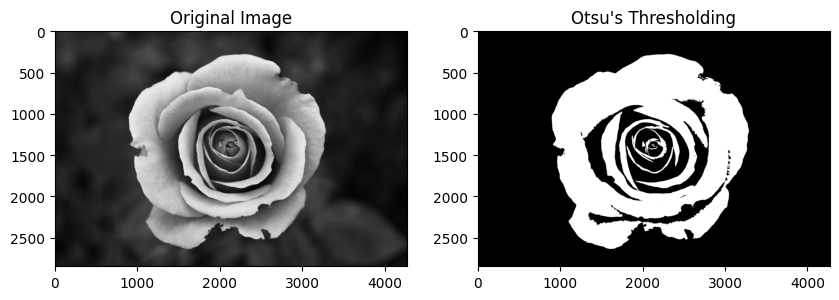

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)
threshold_value,thresh_otsu = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print("Otsu's threshold value:", threshold_value)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(1,2,2), plt.imshow(thresh_otsu, cmap='gray'), plt.title("Otsu's Thresholding")
plt.show()


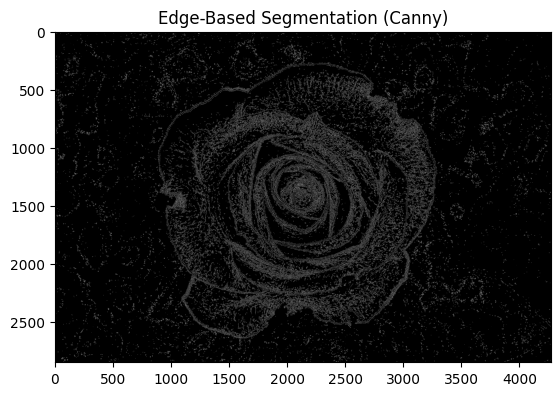

In [ ]:
image = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)

edges = cv2.Canny(image, 10, 20)

plt.imshow(edges, cmap='gray')
plt.title("Edge-Based Segmentation (Canny)")
plt.show()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def region_growing(img, seed):
    height, width = img.shape
    segmented = np.zeros_like(img, dtype=np.uint8)
    stack = [seed]

    while stack:
        x, y = stack.pop()
        if segmented[x, y] == 0:
            segmented[x, y] = 255
            for dx, dy in [(-1,0), (1,0), (0,-1), (0,1)]:
                nx, ny = x + dx, y + dy
                if 0 <= nx < height and 0 <= ny < width and img[nx, ny] > 50 and segmented[nx, ny] == 0:
                    stack.append((nx, ny))

    return segmented

image = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)

if image[100, 100] <= 127:
    y, x = np.where(image > 127)
    if len(y) > 0:
        seed_point = (y[0], x[0])
    else:
        print("No bright pixels found in the image.")
        exit()
else:
    seed_point = (100, 100)

seg_result = region_growing(image, seed_point)

plt.imshow(seg_result, cmap='gray', vmin=0, vmax=255)
plt.title("Region Growing Segmentation")
plt.show()


In [ ]:
# Region Growing
# Region Splitting and Merging
#